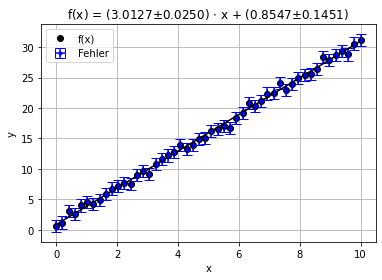

y werte wurden leicht gescramblet 
y_err=0.0001

curve_fit:
[3.00375132 0.89953238]
Fehler:
absolute_sigma:False/scalierung an
[0.02495453 0.14480825]
absolute_sigma:True/scalierung aus
[0.0480196  0.27865221]

odr:
[3.01271231 0.8547274 ]
Fehler:
sd_beta/scalierung an
[0.02502153 0.14514705]
aus cov matrix mit scalierung von res_var:
[0.02502153 0.14514705]
aus cov matrix ohne scalierung von res_var:
[0.15263496 0.88541794]
Beta: [3.01271231 0.8547274 ]
Beta Std Error: [0.02502153 0.14514705]
Beta Covariance: [[ 0.02329743 -0.11648718]
 [-0.11648718  0.78396492]]
Residual Variance: 0.02687322658899519
Inverse Condition #: 0.008685855355873453
Reason(s) for Halting:
  Sum of squares convergence


In [4]:
%run ./odr.ipynb
import numpy as np
from scipy.optimize import curve_fit

def f(x,m,b):
    return m*x+b
xdata = np.linspace(0, 10, 50)
np.random.seed(1729)
ydata = f(xdata,3,1)
y_noise = 0.5 * np.random.normal(size=xdata.size)
ydata = ydata + y_noise
y_err = np.full(len(ydata),1)
popt, pcov = curve_fit(f, xdata, ydata,sigma=y_err,absolute_sigma=False)
popt_true, pcov_true = curve_fit(f, xdata, ydata,sigma=y_err,absolute_sigma=True)

perr = np.sqrt(np.diag(pcov))
perr_ture = np.sqrt(np.diag(pcov_true))


out=zeichnen(xdata,ydata,y_err=y_err)

print("y werte wurden leicht gescramblet ")
print("y_err=0.0001")

print("\ncurve_fit:")
print(popt)
print("Fehler:")
print("absolute_sigma:False/scalierung an")
print(perr)
print("absolute_sigma:True/scalierung aus")
print(perr_ture)

print("\nodr:")
print(out.beta)
print("Fehler:")
print("sd_beta/scalierung an")
print(out.sd_beta)
print("aus cov matrix mit scalierung von res_var:")
print(np.sqrt(np.diag(out.cov_beta*out.res_var)))
print("aus cov matrix ohne scalierung von res_var:")
print(np.sqrt(np.diag(out.cov_beta)))
out.pprint()